
Notes:
1.   Convert variables ['host_identity_verified', 'is_location_exact', 'instant_bookable', **'fraud'**, 'property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city'] to categorical. **No idea about the definition of 'city', keep this variable as categorical.**
2.   Drop outliers
*   df_noout = df[df['host_total_listings_count'] < 100]
*   df_noout = df_noout[df_noout['price'] < 160000]

3. Skip EDA part, start to plot histograms or barplots group by fraud (0 or 1)
4. Create lmplot, only contains graphs have different trends (e.g., one is positive, the other is negative) group by (fraud = 0) and (fraud = 1). Also keep plots showing strong association (e.g., steeper slope)

## Data Manipulation

In [1]:
# Packages
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [2]:
# Import and glimpse the data
df = pd.read_csv('/content/output.csv')
df

,host_response_rate,host_identity_verified,host_total_listings_count,city,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,...,bed_type,amenities,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month,fraud
0,90,1,6,1,1,0,1,1,1.0,1,...,4,547,4000,7,34,90,0,2,0.38,0
1,100,1,7,2,1,8,1,2,1.0,1,...,4,1158,14500,3,36,91,0,2,0.40,0
2,100,1,7,2,1,0,0,4,1.0,1,...,4,2016,19500,3,47,95,0,2,0.54,1
3,100,1,1,2,1,0,1,2,1.0,1,...,4,964,6500,3,41,98,0,1,0.47,0
4,100,0,12,2,1,0,0,3,1.0,1,...,4,1794,15400,30,18,91,0,1,0.21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,100,0,1,2,1,8,1,1,1.0,1,...,4,265,19000,1,0,100,0,1,1.00,0
3581,100,0,1,12,0,8,1,1,1.0,1,...,4,2279,5500,1,0,100,0,0,1.00,0
3582,100,1,1,2,0,0,1,2,1.0,1,...,4,2569,9000,1,0,100,0,2,1.00,0
3583,100,1,2,2,0,0,2,1,1.0,1,...,4,800,4900,1,0,100,0,2,1.00,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         3585 non-null   int64  
 1   host_identity_verified     3585 non-null   int64  
 2   host_total_listings_count  3585 non-null   int64  
 3   city                       3585 non-null   int64  
 4   is_location_exact          3585 non-null   int64  
 5   property_type              3585 non-null   int64  
 6   room_type                  3585 non-null   int64  
 7   accommodates               3585 non-null   int64  
 8   bathrooms                  3585 non-null   float64
 9   bedrooms                   3585 non-null   int64  
 10  beds                       3585 non-null   int64  
 11  bed_type                   3585 non-null   int64  
 12  amenities                  3585 non-null   int64  
 13  price                      3585 non-null   int64

In [4]:
df.describe(include = 'all')

,host_response_rate,host_identity_verified,host_total_listings_count,city,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,...,bed_type,amenities,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month,fraud
count,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,...,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000
mean,95.64742,0.726081,58.902371,2.820363,0.859135,1.873361,0.429010,3.041283,1.220781,1.255230,...,3.909902,1570.437378,17392.580195,3.171269,19.044630,93.749791,0.165690,1.210042,1.766165,0.213947
std,11.78841,0.446030,171.119663,4.071361,0.347930,3.327397,0.538211,1.778929,0.500698,0.752129,...,0.511011,873.197307,14833.132129,8.874133,35.571658,9.039049,0.371854,0.877998,1.924877,0.410147
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1000.000000,1.000000,0.000000,20.000000,0.000000,0.000000,0.010000,0.000000
25%,98.00000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,...,4.000000,844.000000,8500.000000,1.000000,1.000000,91.000000,0.000000,0.000000,0.640000,0.000000
50%,100.00000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,...,4.000000,1604.000000,15000.000000,2.000000,5.000000,97.000000,0.000000,1.000000,1.000000,0.000000
75%,100.00000,1.000000,7.000000,2.000000,1.000000,4.000000,1.000000,4.000000,1.000000,2.000000,...,4.000000,2280.000000,22000.000000,3.000000,21.000000,100.000000,0.000000,2.000000,2.130000,0.000000
max,100.00000,1.000000,749.000000,37.000000,1.000000,12.000000,2.000000,16.000000,6.000000,5.000000,...,4.000000,3091.000000,400000.000000,300.000000,404.000000,100.000000,1.000000,3.000000,19.150000,1.000000


<Axes: >

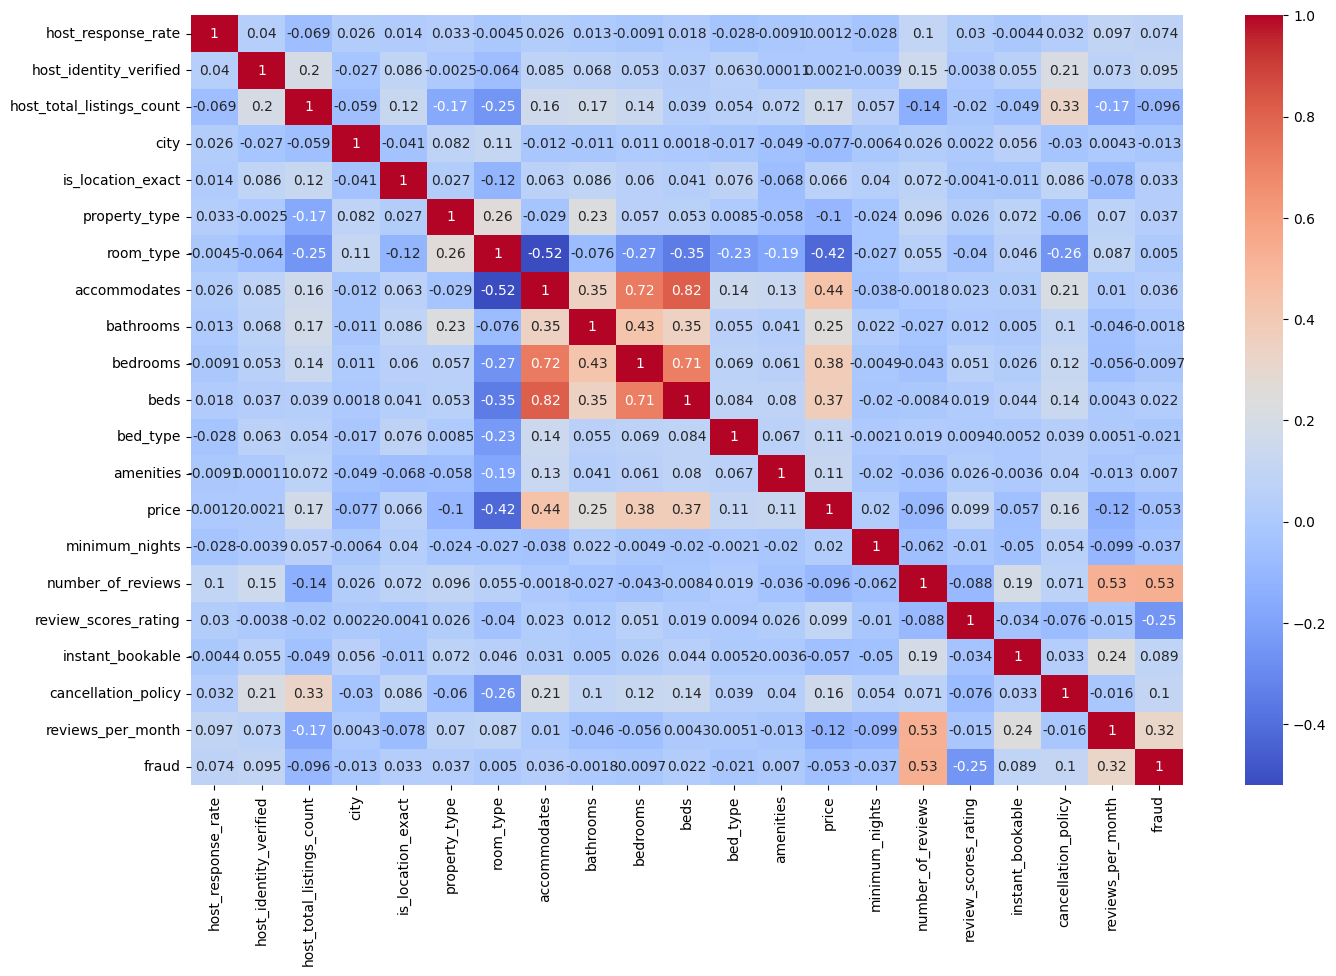

In [5]:
plt.figure(figsize=(16,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

There are 3585 observations and 21 variables.



*   Binary Variables: host_identity_verified, is_location_exact, instant_bookable, fraud.
*   Categorical Variables: property_type, room_type, bed_type, cancellation_policy, city.

Change the variables mentioned above from integer to categorical variables since the value itself is meaningless while the corresponding level may be useful to explain the association.


In [6]:
# change variables from integer to categorical
categorical_variables = ['host_identity_verified', 'is_location_exact', 'instant_bookable', 'fraud',
                         'property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city']
df[categorical_variables] = df[categorical_variables].astype('category')

In [7]:
# drop outliers
df_noout = df[df['host_total_listings_count'] < 100]
df_noout = df_noout[df_noout['price'] < 160000]

<ipython-input-8-8a1e8e3ed1ed>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_noout.corr()


<Axes: >

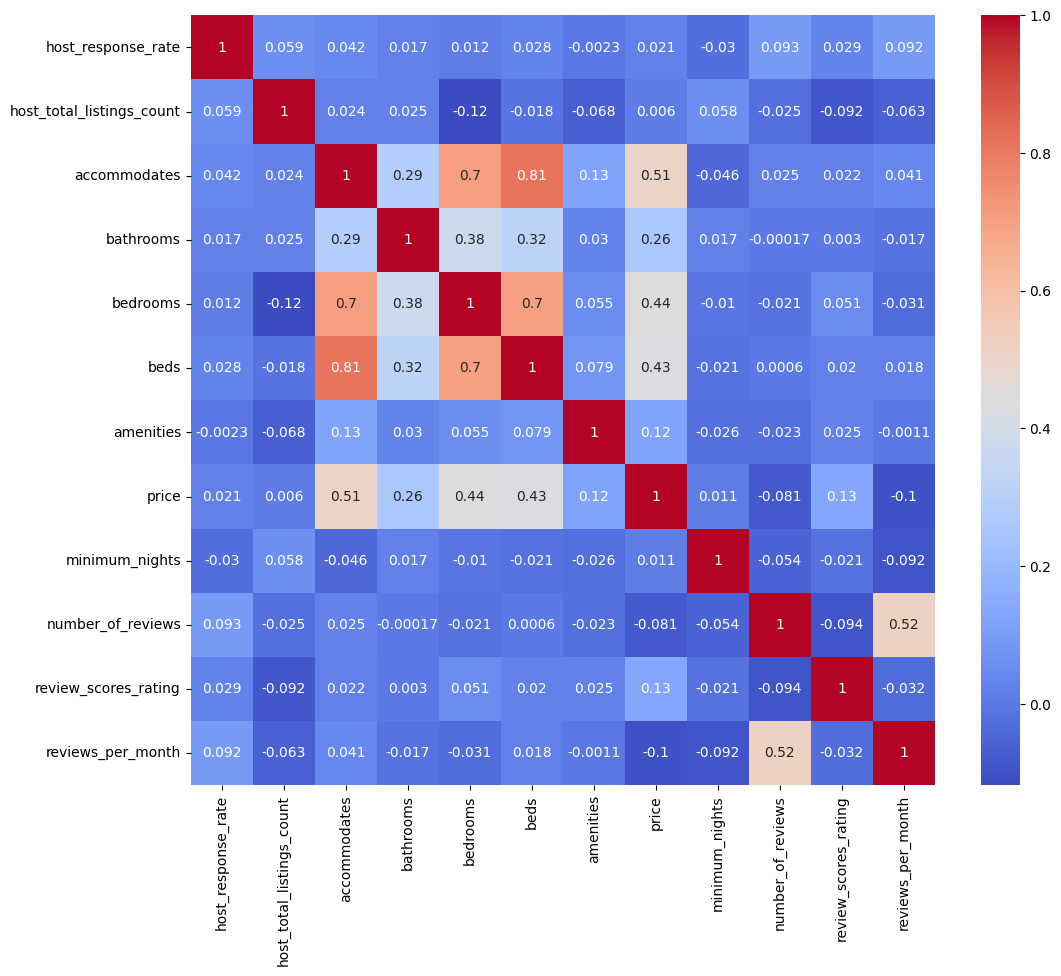

In [8]:
plt.figure(figsize=(12,10))
corr_matrix = df_noout.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [9]:
df_noout.describe(include = 'all')

,host_response_rate,host_identity_verified,host_total_listings_count,city,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,...,bed_type,amenities,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month,fraud
count,3211.000000,3211.0,3211.000000,3211.0,3211.0,3211.0,3211.0,3211.000000,3211.000000,3211.000000,...,3211.0,3211.000000,3211.000000,3211.000000,3211.000000,3211.000000,3211.0,3211.0,3211.000000,3211.0
unique,NaN,2.0,NaN,38.0,2.0,13.0,3.0,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,2.0
top,NaN,1.0,NaN,2.0,1.0,0.0,0.0,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,0.0,2.0,NaN,0.0
freq,NaN,2231.0,NaN,3013.0,2709.0,2259.0,1756.0,NaN,NaN,NaN,...,3079.0,NaN,NaN,NaN,NaN,NaN,2675.0,1367.0,NaN,2483.0
mean,96.095609,NaN,4.923388,NaN,NaN,NaN,NaN,2.934600,1.189972,1.212395,...,NaN,1546.380255,16222.578636,3.005606,20.804734,93.800374,NaN,NaN,1.884569,NaN
std,11.933978,NaN,8.726248,NaN,NaN,NaN,NaN,1.794789,0.487097,0.748653,...,NaN,908.290361,12555.832853,9.243570,37.117808,8.775728,NaN,NaN,1.991623,NaN
min,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,...,NaN,0.000000,1000.000000,1.000000,0.000000,20.000000,NaN,NaN,0.030000,NaN
25%,100.000000,NaN,1.000000,NaN,NaN,NaN,NaN,2.000000,1.000000,1.000000,...,NaN,758.500000,8000.000000,1.000000,1.000000,91.000000,NaN,NaN,0.710000,NaN
50%,100.000000,NaN,1.000000,NaN,NaN,NaN,NaN,2.000000,1.000000,1.000000,...,NaN,1519.000000,13500.000000,2.000000,6.000000,97.000000,NaN,NaN,1.000000,NaN
75%,100.000000,NaN,4.000000,NaN,NaN,NaN,NaN,4.000000,1.000000,1.000000,...,NaN,2348.500000,20000.000000,3.000000,23.000000,100.000000,NaN,NaN,2.385000,NaN


There are 3211 observations now by droppoing 374 observations.

## Plots

In [10]:
df_noout.columns

Index(['host_response_rate', 'host_identity_verified',
       'host_total_listings_count', 'city', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'minimum_nights',
       'number_of_reviews', 'review_scores_rating', 'instant_bookable',
       'cancellation_policy', 'reviews_per_month', 'fraud'],
      dtype='object')

* Numerical Variables

In [11]:
# numerical variables list
num_var = ['host_response_rate', 'host_total_listings_count', 'accommodates',
            'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
            'number_of_reviews', 'review_scores_rating', 'reviews_per_month']

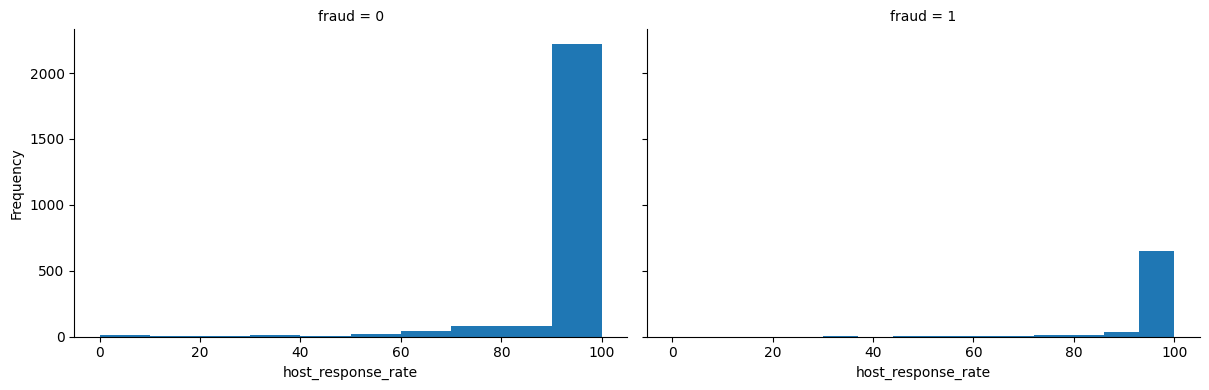

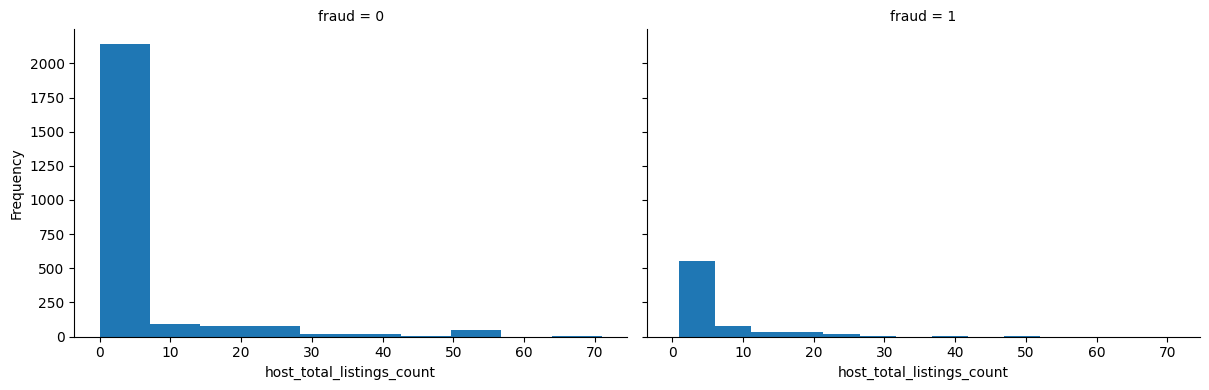

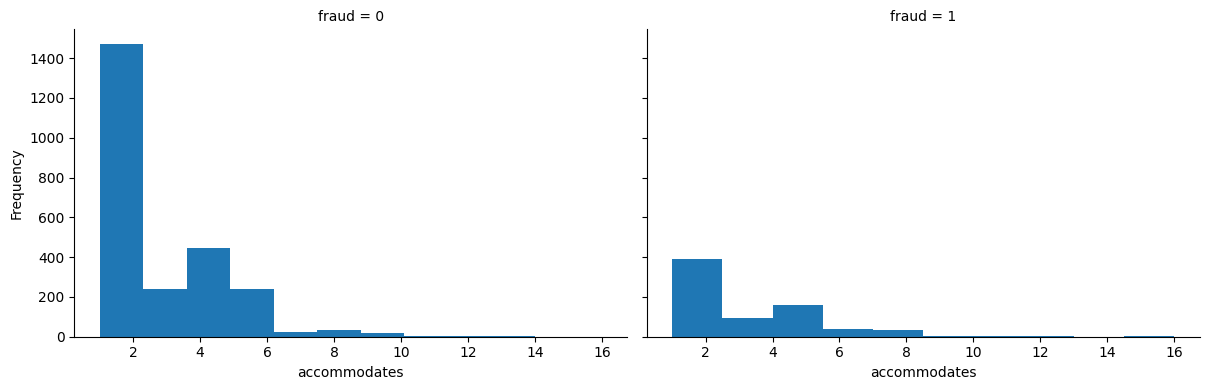

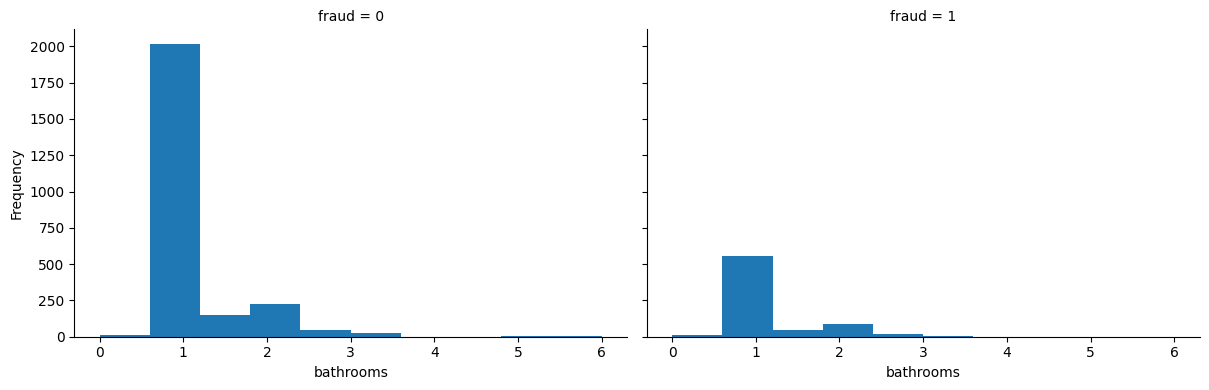

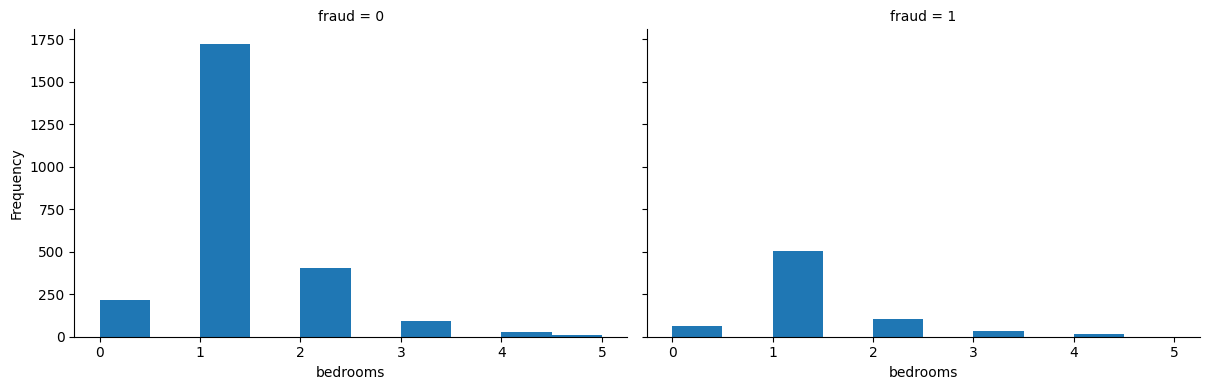

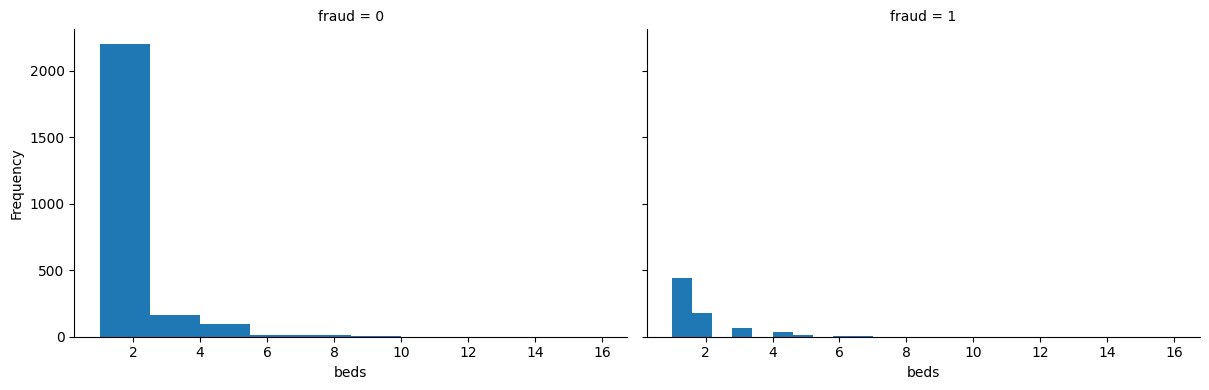

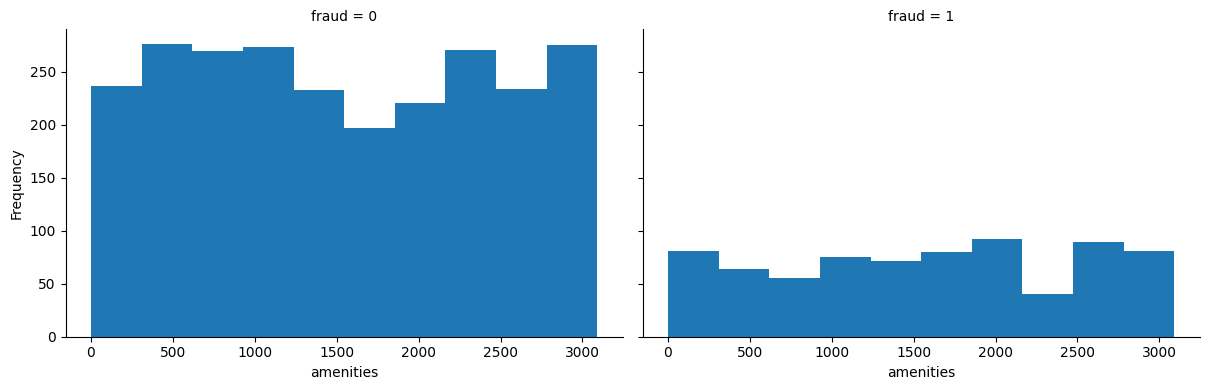

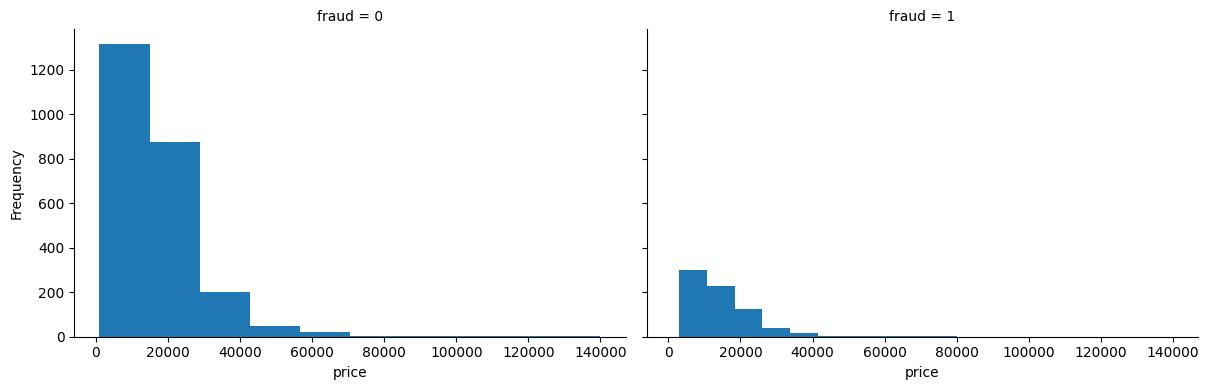

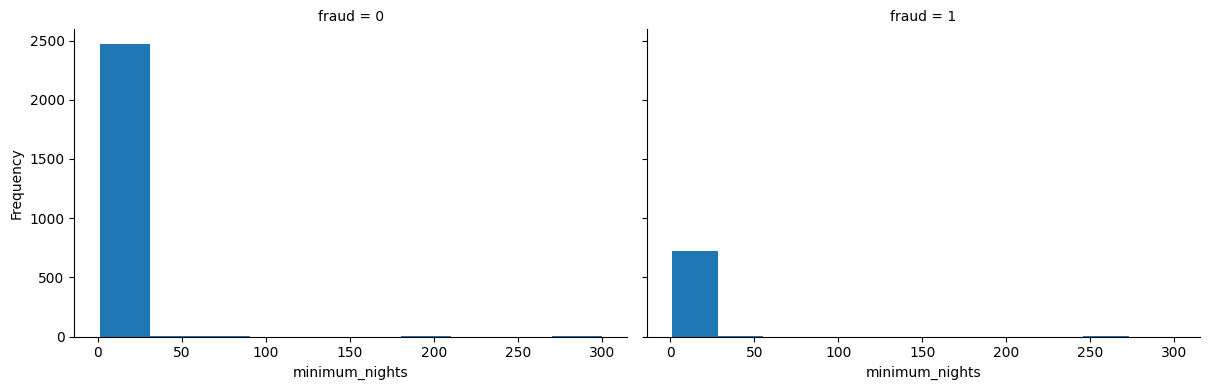

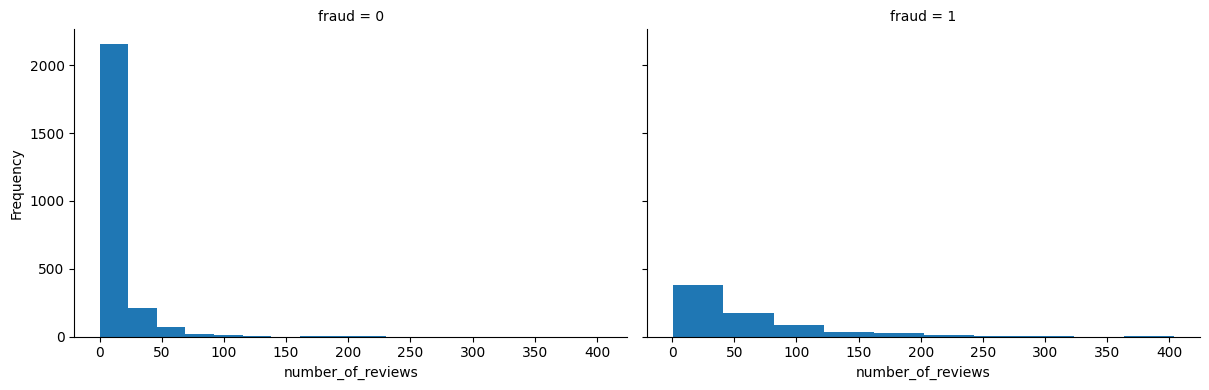

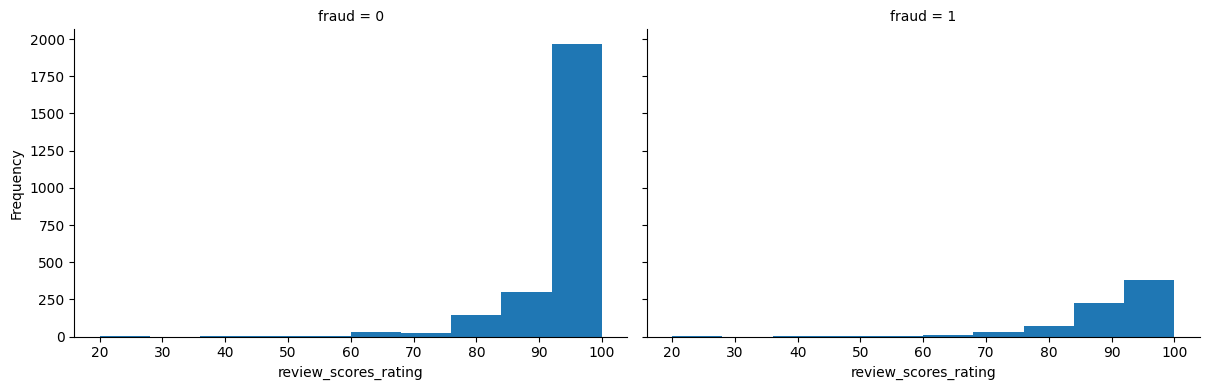

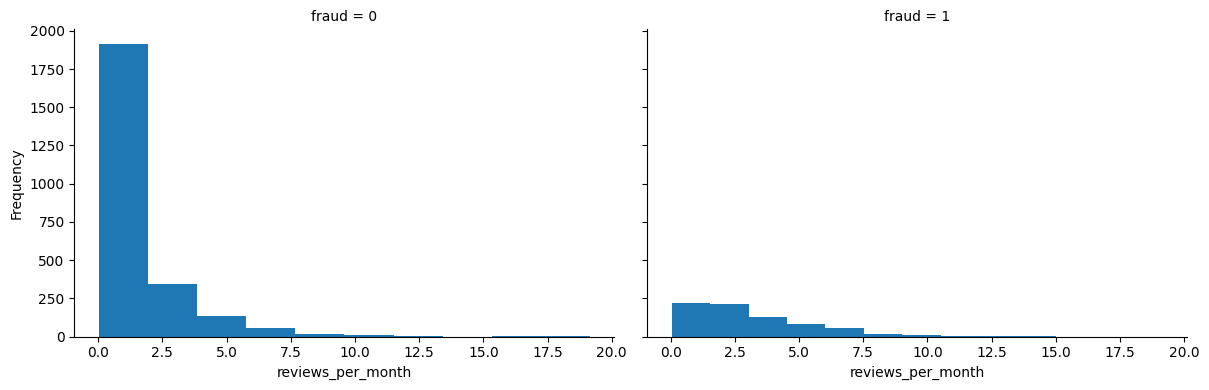

In [12]:
# plot histograms for each numerical variable group by fraud
for var in num_var :
  plot = sns.FacetGrid(df_noout, col='fraud', height=4, aspect = 1.5)
  plot.map(plt.hist, var)
  plot.set_axis_labels(var, 'Frequency')
  plt.show()


Overall, # (fraud = 0) > # (fraud = 1)
*   host_response_rate: left-skewed, most of the observations have high response rate (e.g., rate >= 80)  
*   host_total_listings_count: right-skewed, most observations have low count. The range of # listing count for (fraud = 0) group is larger since there are some have count larger than 40 while # listing count in (fraud = 1) group concentrated from 0 to 25.
*   accommodates: right-skewed, (fraud = 1) and (fraud = 0) both have number concentrated around 2 to 4.
*   bathrooms and bedrooms (most have one or two),
*  beds: many observations have 2 beds for both fraud group.
*   amenities: (fraud = 0) has three modes (amentites = 750, 2250, 3000); (fraud = 1) has two modes (amentites = 2000, 2750). The range is relative large.
*  price: right-skewed, most are less than 20000. The range of (fraud = 0) listing is larger.
* minimum_nights, number_of_reviews, reviews_per_month: right-skewed,
reviews_per_month all have left-skewed hitograms.
*   reviews_scores_rating left-skewed.

*Interpretation: center (mean or median), range(e.g., min and max), skewness or shape*


* Categorical Variables

In [13]:
# copy from the data cleaning section, except 'fraud' because it is the target variable
categorical_variables = ['host_identity_verified', 'is_location_exact', 'instant_bookable',
                         'property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city']

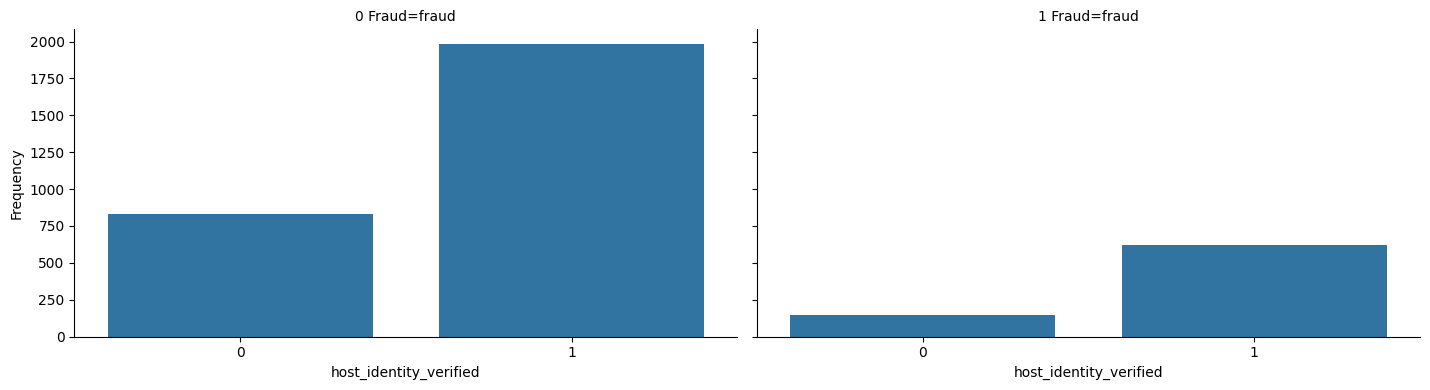

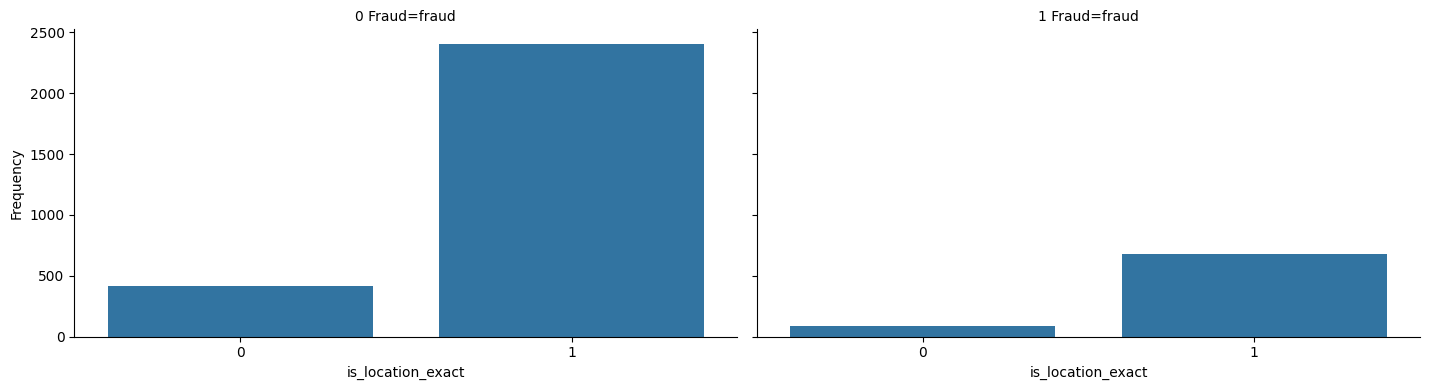

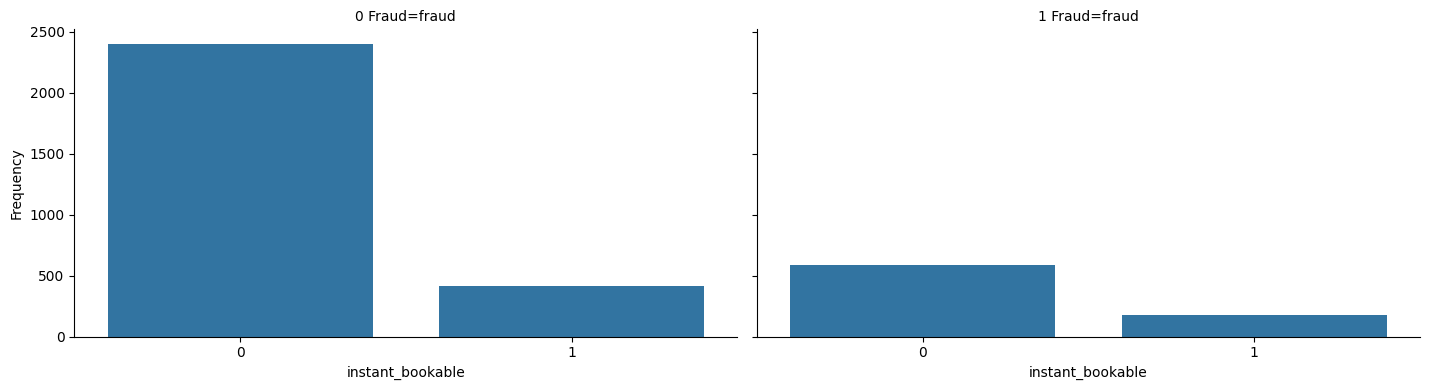

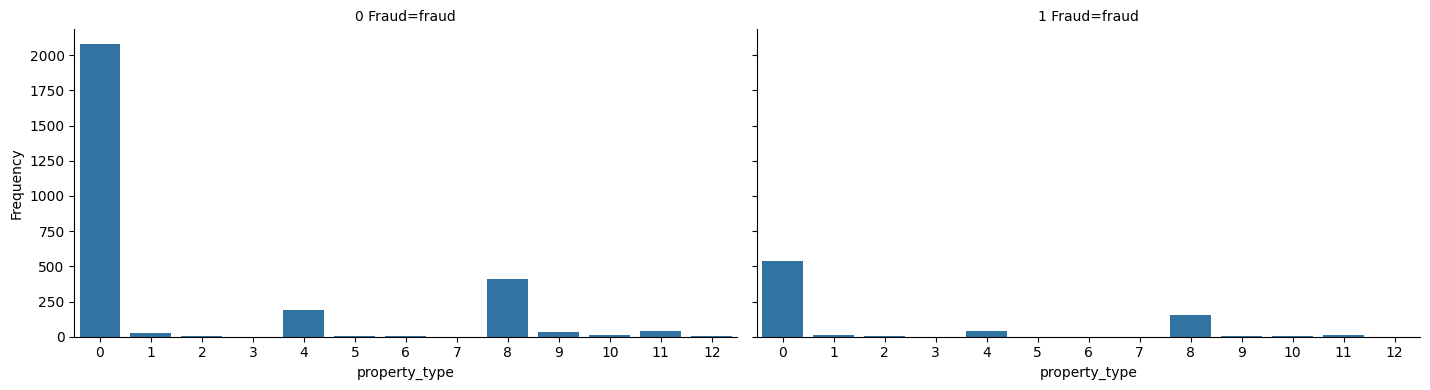

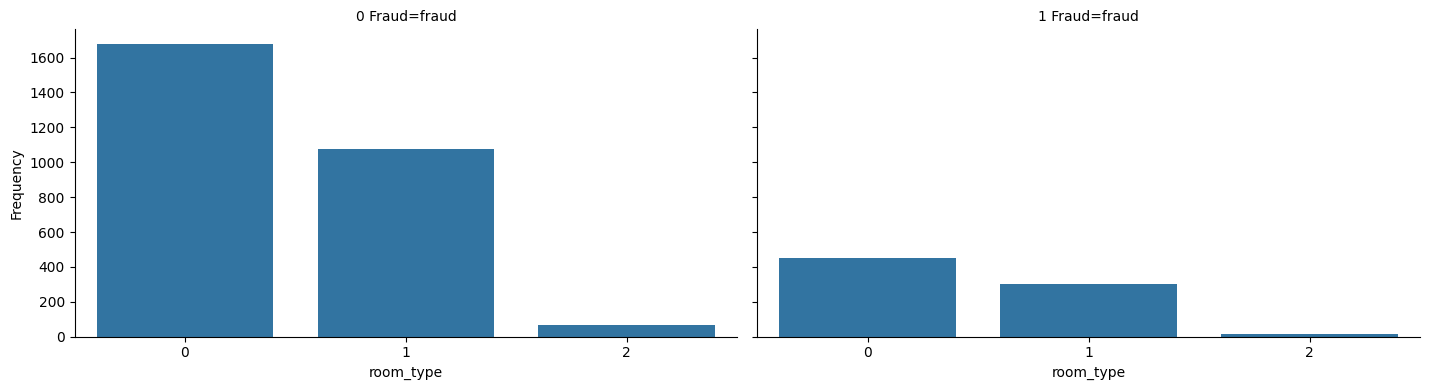

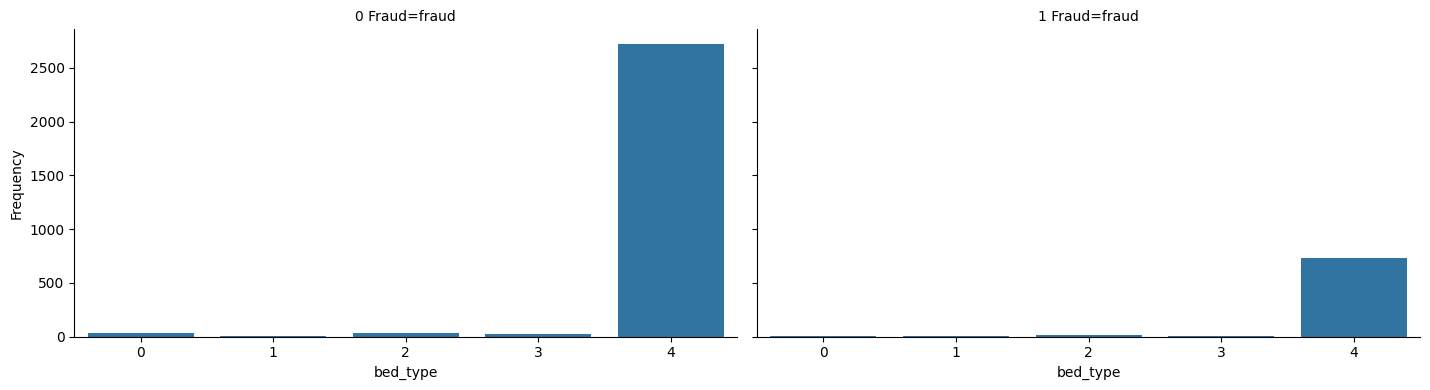

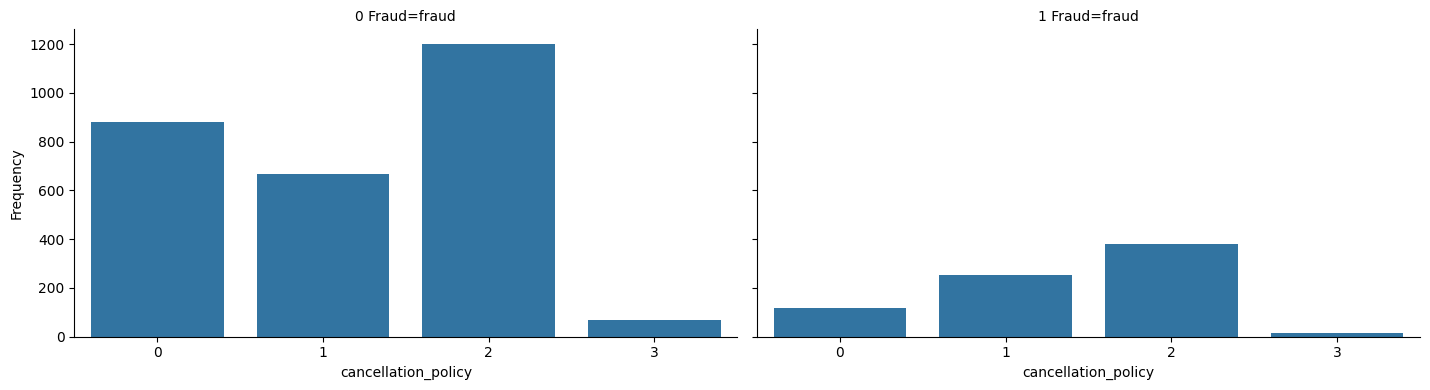

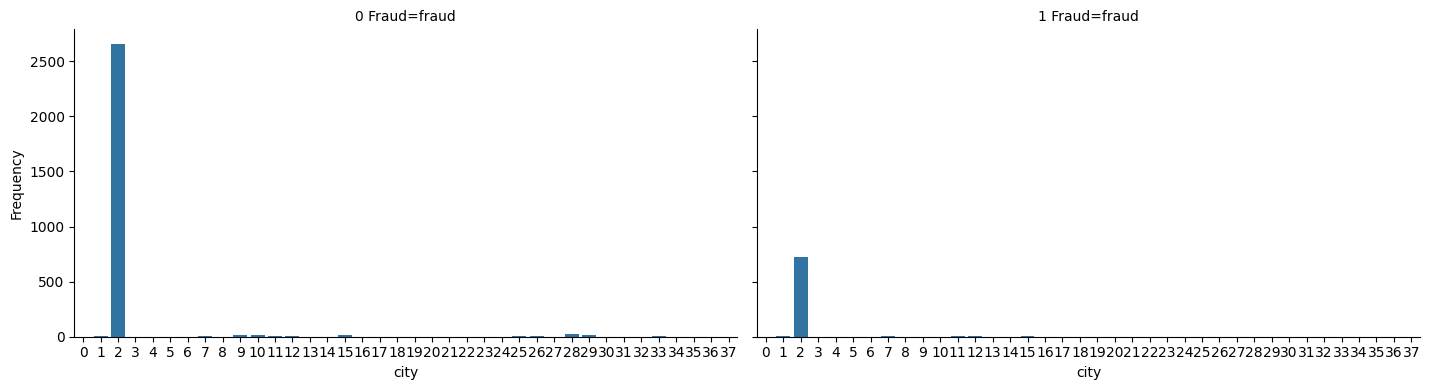

In [14]:
import warnings
warnings.filterwarnings("ignore") # hide the warning messages

# Bar plot for each categorical variables group by fraud again
for var in categorical_variables:
    plot = sns.FacetGrid(df, col='fraud', height=4, aspect=1.8)
    plot.map(sns.countplot, var)
    plot.set_axis_labels(var, 'Frequency')
    plot.set_titles(col_template="{col_name} Fraud={col_var}")
    plt.show()

Need more information about the definition for these variables.







In [22]:
# lmplot for each pair of numerical variables group by fraud
# for var_x in num_var:
#    for var_y in num_var:
#        if var_x != var_y:  # Exclude plotting the variable against itself
#            plot = sns.lmplot(x=var_x, y=var_y, hue='fraud', data=df_noout, height=6)
#            plt.show()

Keep 5-8 graphs from below? select most useful ones (align the results from the stat model part, or can explain the model results)


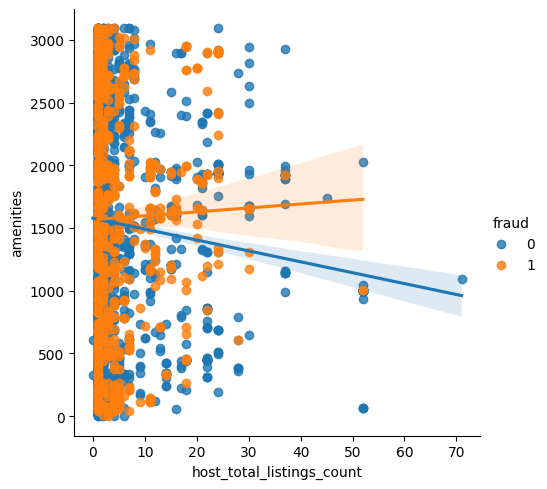

In [15]:
sns.lmplot(x = 'host_total_listings_count', y = 'amenities',
           hue = 'fraud', data = df_noout)

In [ ]:
sns.lmplot(x = 'host_total_listings_count', y = 'review_scores_rating',
           hue = 'fraud', data = df_noout)

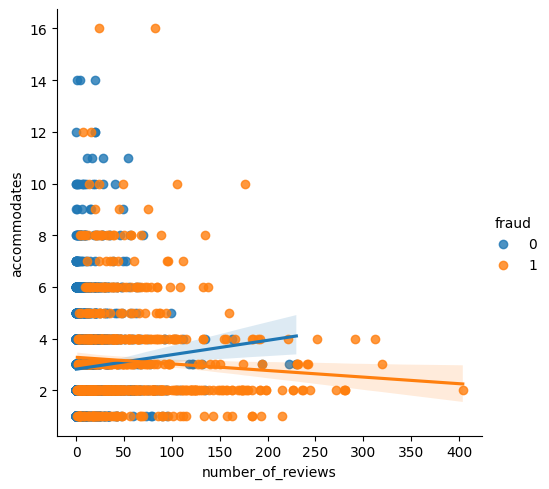

In [16]:
sns.lmplot(x = 'number_of_reviews',y= 'accommodates',
           hue = 'fraud', data = df_noout)

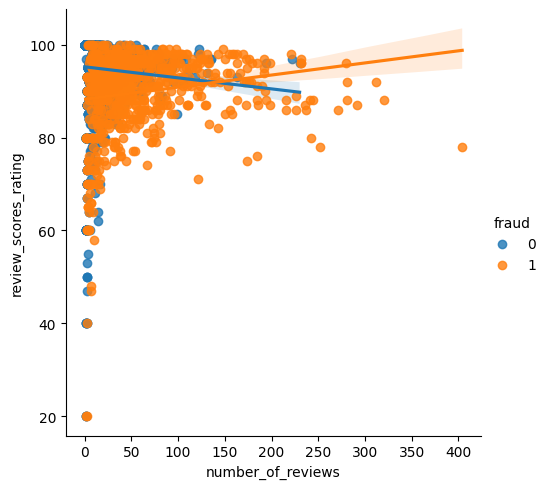

In [17]:
sns.lmplot(y = 'review_scores_rating',x= 'number_of_reviews',
           hue = 'fraud', data = df_noout)

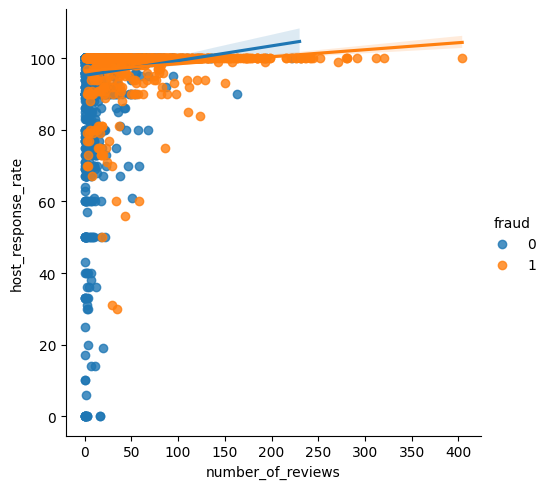

In [47]:
sns.lmplot(x = 'number_of_reviews',y = 'host_response_rate',
           hue = 'fraud', data = df_noout)

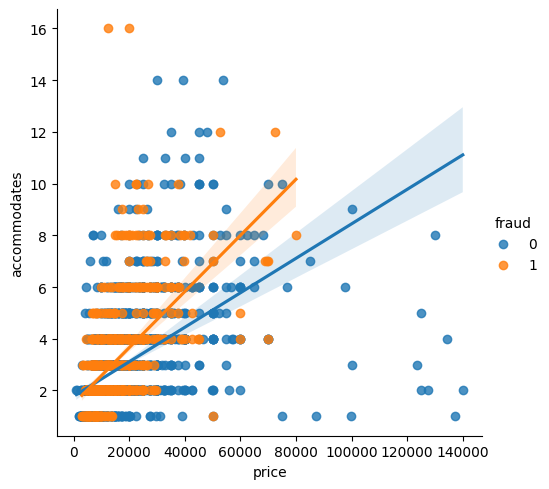

In [19]:
sns.lmplot(x = 'price',y= 'accommodates',
           hue = 'fraud', data = df_noout)

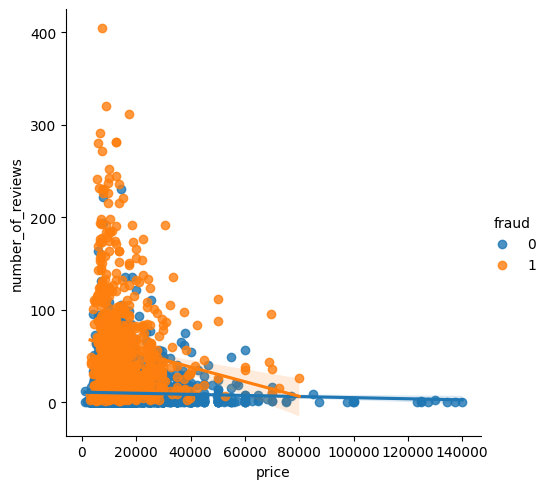

In [18]:
sns.lmplot(x = 'price',y= 'number_of_reviews',
           hue = 'fraud', data = df_noout)

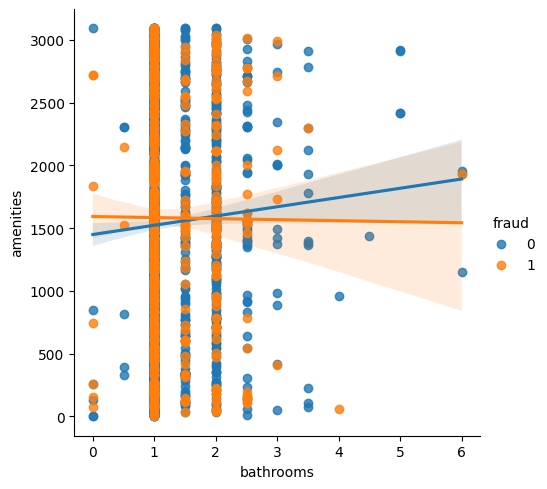

In [20]:
sns.lmplot(x = 'bathrooms',y= 'amenities',
           hue = 'fraud', data = df_noout)

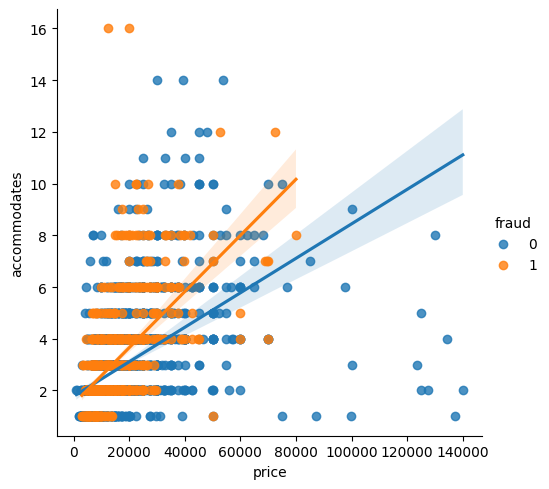

In [21]:
sns.lmplot(x = 'price',y= 'accommodates',
           hue = 'fraud', data = df_noout)

In [ ]:
sns.lmplot(x = 'price',y = 'beds',
           hue = 'fraud', data = df_noout)

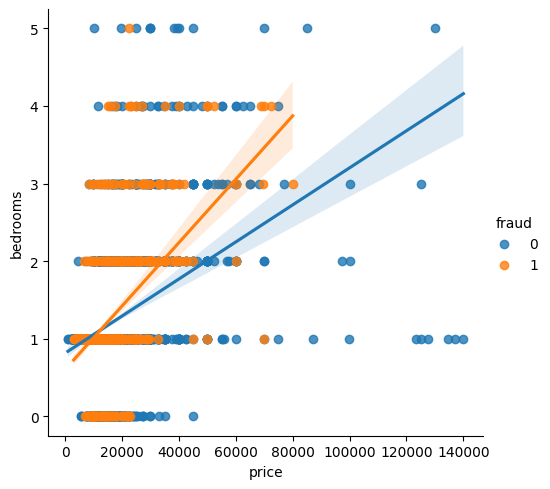

In [35]:
sns.lmplot(x = 'price',y = 'bedrooms',
           hue = 'fraud', data = df_noout)

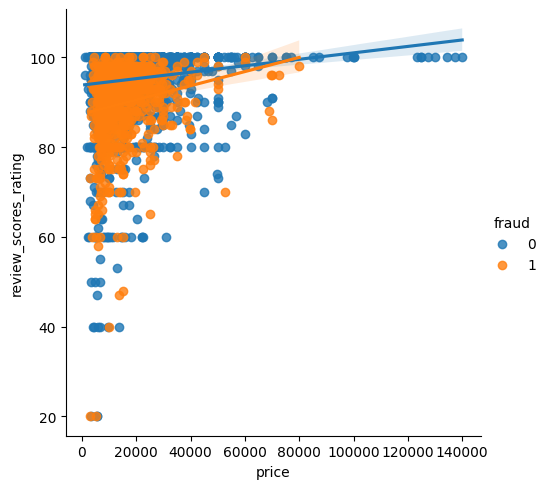

In [37]:
sns.lmplot(x = 'price', y = 'review_scores_rating',
           hue = 'fraud', data = df_noout)

In [ ]:
sns.lmplot(x = 'accommodates', y = 'reviews_per_month',
           hue = 'fraud', data = df_noout)

In [ ]:
sns.lmplot(x = 'bathrooms', y = 'amenities',
           hue = 'fraud', data = df_noout)

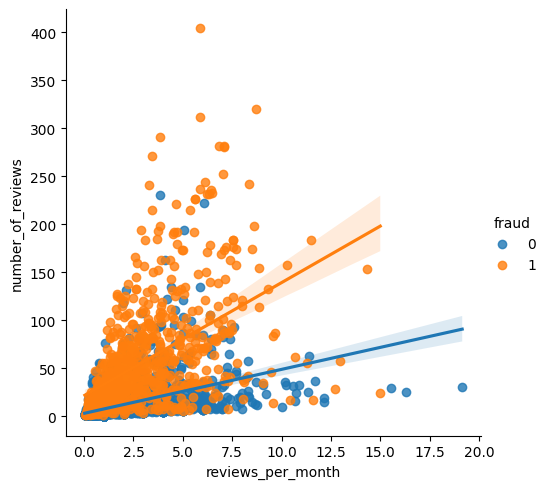

In [39]:
sns.lmplot(x = 'reviews_per_month', y = 'number_of_reviews',
           hue = 'fraud', data = df_noout)

In [ ]:
sns.lmplot(x = 'reviews_per_month',y = 'review_scores_rating',
           hue = 'fraud', data = df_noout)